# 泊松重建
## 一、介绍
泊松重建(Poisson reconstruction)的输入是点云和指向曲面内部的法向量(也被称为有向点 oriented point)，输出的是曲面的一个封闭的(watertight)的三角逼近。
和贪婪投影三角法进行**局部投影插值**不同，泊松重建算法对观测样本进行**全局逼近**。

## 二、原理
定义三维指示函数$x_M$，在物体内取$1$， 在物体外取$0$。则指示函数的梯度物体表面法向量(指向物体内部)，正好对应采样点处估计得到的法向量。

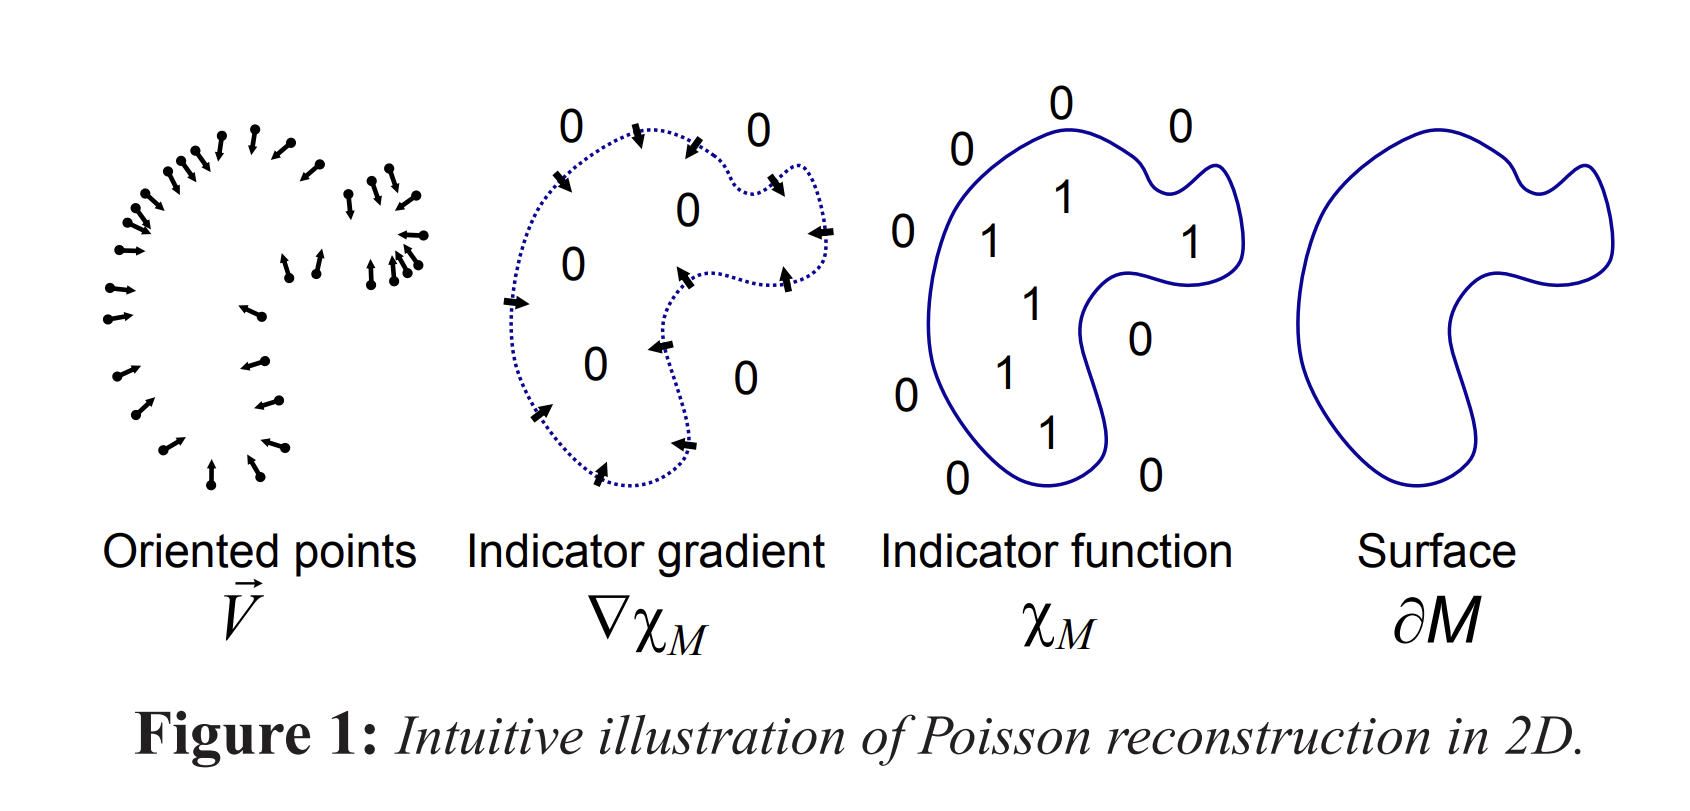

In [5]:
from PIL import Image
display(Image.open("../../resources/Poisson/Poisson_reconstruction.png"))

因此曲面重建问题即求解微分方程$\nabla x_M = \mathbf{V}$，然而向量场$\mathbf{V}$并不一定是无旋的(curl-free)，因此不一定可积分，也就是说实际解并不一定存在，只能得到一个**最小二乘近似解**。为了获得最好的最小二乘逼近解，将两边再加上一个散度算子，
转换成泊松方程

$$\Delta \tilde{X}=\nabla \cdot \mathbf{V}$$

要从Poisson方程中解出指示函数$x_M$，首先需要知道向量场$\mathbf{V}$的解析形式，但是我们只有向量场$V$的采样。

论文中用到数值分析中的技巧——**选择基函数$\{F_i\}$构造函数空间**来逼近向量场$\mathbf{V}$。Poisson重建没有采用类似多项式的全局基函数，而是用了类似小波基的局部基函数，
构造关于采样点的八叉树(Octree)，并以每个叶子节点的位置为中心，构造局部基函数(有O个基函数，O为八叉树叶子节点个数)，这样可以获得近似向量场$\mathbf{\hat{V}}$，可以对其求散度。而指示函数$x_M$则可以表示成基函数$\{F_i\}$线性组合的形式，线性组合系数为待求解参数。
最终Poisson方程被离散成如下最小二乘的形式

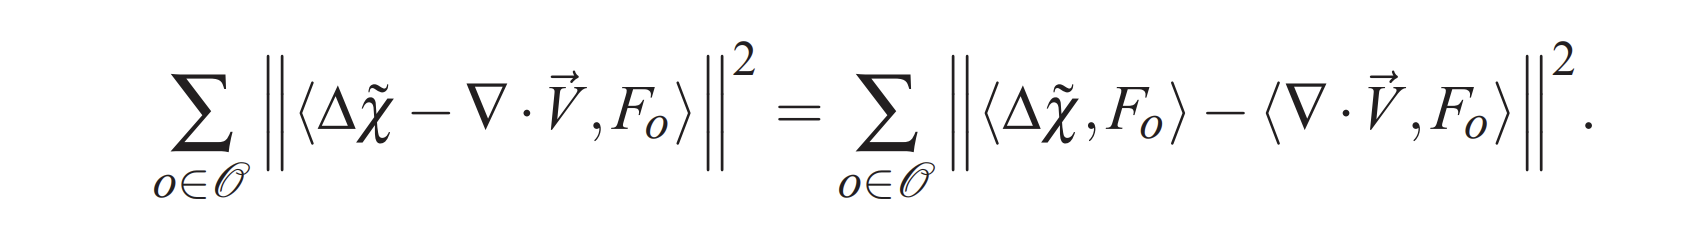

In [6]:
from PIL import Image
display(Image.open("../../resources/Poisson/least_square.png"))

就是让Poisson方程在基函数上投影尽量趋于$0$，这是一个简单的线性方程求解问题。求出指示函数$x_M$后，相当于求出了曲面的隐式函数(implicit function)，重建曲面即在
指示函数的某个等值面(isosurface)上，这里论文中取指示函数在所有采样点上的值的平均$S$，即$x_M=S$为重建曲面。构造重建曲面的方法使用了八叉树表示下的移动三角形(Marching Cubes, MC)算法。


**注意**：
1. Poisson重建可以处理点云采样密度不均的情况，只需要提前进行点云密度的估计，并作为权重加入求解中即可。
2. Poisson重建更适合封闭(watertight)的模型，对于非封闭的模型会有多余的面片，而且没有很好的解决方法。
3. Poisson重建算法稳健性差，对外点，空洞抗干扰能力差，且**无法还原尖锐的特征**。

## 三、参考文献
[1] Kazhdan M . Poisson surface reconstruction[C]// Eurographics Symposium on Geometry Processing. 2006.